In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots

warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Preparation

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
players_path = '/content/drive/My Drive/Capstone/Data/Clean/Players_Clean.pkl'
stats_path = '/content/drive/My Drive/Capstone/Data/Clean/stats_Clean.pkl'
markval_path = '/content/drive/My Drive/Capstone/Data/Clean/markval_Clean.pkl'

players = pd.read_pickle(players_path)
stats = pd.read_pickle(stats_path)
markval = pd.read_pickle(markval_path)

In [0]:
stats_copy = stats.copy()
players_copy = players.copy()
markval_copy = markval.copy()

In [0]:
stats_mean = pd.pivot_table(stats_copy, values = 'value', index = 'tm_id', columns = 'attribute')
stats_mean.head(10)

attribute,app,a,cs,g,gc,mpg,mp,og,ppg,pg,rc,syc,s,soff,son,yc
tm_id,,,,,,,,,,,,,,,,
3,10.648649,1.351351,NaN,0.594595,NaN,390.864865,802.513514,0.000000,1.450811,0.000000,0.027027,0.000000,11.162162,2.405405,1.378378,1.027027
4,12.488889,0.777778,NaN,3.866667,NaN,193.866667,957.288889,0.000000,1.659333,0.800000,0.000000,0.044444,12.755556,3.644444,1.666667,1.088889
5,7.791667,0.125000,NaN,0.166667,NaN,160.916667,613.000000,0.000000,1.192917,0.000000,0.083333,0.000000,9.625000,0.791667,0.875000,1.041667
6,8.097561,NaN,2.365854,NaN,10.951220,NaN,728.390244,0.000000,0.920732,NaN,0.000000,0.000000,12.658537,0.121951,0.073171,0.292683
7,8.761905,0.619048,NaN,0.380952,NaN,308.452381,652.404762,0.000000,1.480238,0.047619,0.142857,0.095238,9.571429,1.404762,1.666667,2.214286
8,7.629630,1.000000,NaN,1.259259,NaN,223.666667,609.000000,0.037037,1.055556,0.000000,0.074074,0.074074,7.925926,1.555556,0.740741,2.037037
10,11.133333,2.233333,NaN,4.316667,NaN,155.350000,800.166667,0.016667,1.671000,0.200000,0.016667,0.050000,11.716667,3.500000,2.033333,1.133333
11,11.976190,NaN,3.476190,NaN,17.404762,NaN,1066.285714,0.047619,1.469286,NaN,0.000000,0.023810,12.666667,0.380952,0.023810,1.261905
12,12.258065,0.290323,NaN,1.322581,NaN,246.483871,996.548387,0.032258,1.347097,0.451613,0.032258,0.032258,12.903226,2.096774,0.645161,1.677419


In [0]:
pl_stats = pd.merge(players_copy, stats_mean, left_on = "tm_id", right_on = "tm_id")

In [0]:
markval_mean = pd.pivot_table(markval_copy, values = 'mv', index = 'tm_id')
markval_mean.head(10)

,mv
tm_id,
4,3.000000e+05
5,1.400000e+06
6,4.833333e+05
7,1.200000e+06
8,1.450000e+06
10,1.154167e+07
11,1.075000e+06
13,4.000000e+05
532,6.171053e+06


In [0]:
pl_stats_markval = pd.merge(pl_stats, markval_mean, left_on = "tm_id", right_on = "tm_id")
pl_stats_markval.mv = pd.to_numeric(pl_stats_markval.mv, downcast = "float")

pl_stats_markval.head()

,tm_id,name,club,nationality,dob,height,sf,field_position,joined,contract_expires,followers,sofifa_id,years_left,age,current_mv,main_field_position,league,nationalities,continent,years_at_club,app,a,cs,g,gc,mpg,mp,og,ppg,pg,rc,syc,s,soff,son,yc,mv
0,17259,Manuel Neuer,Bayern Munich,Germany,1986-03-27,193.0,right,GK,2011-07-01,2021-06-30,10043887.0,167495.0,1.0,34.0,18000000.0,goalkeepers,Bundesliga,[Germany],EU,8.0,10.438596,NaN,5.000000,NaN,8.228070,NaN,942.631579,0.000000,1.927719,NaN,0.000000,0.0,10.877193,0.087719,0.035088,0.315789,23015000.00
1,40680,Sven Ulreich,Bayern Munich,Germany,1988-08-03,192.0,right,GK,2015-07-01,2021-06-30,284045.0,186569.0,1.0,31.0,4500000.0,goalkeepers,Bundesliga,[Germany],EU,4.0,8.555556,NaN,2.422222,NaN,11.311111,NaN,770.555556,0.022222,1.503556,NaN,0.000000,0.0,12.088889,0.000000,0.088889,0.422222,3403846.25
2,336307,Christian Früchtl,Bayern Munich,Germany,2000-01-28,193.0,left,GK,2017-07-01,2022-06-30,110873.0,NaN,2.0,20.0,500000.0,goalkeepers,Bundesliga,[Germany],EU,2.0,4.421053,NaN,1.684211,NaN,5.000000,NaN,380.894737,0.000000,1.266316,NaN,0.052632,0.0,5.789474,0.000000,0.000000,0.263158,325000.00
3,336307,Christian Früchtl,Bayern Munich,Germany,2000-01-28,193.0,left,GK,2017-07-01,2022-06-30,NaN,NaN,2.0,20.0,500000.0,goalkeepers,Bundesliga,[Germany],EU,2.0,4.421053,NaN,1.684211,NaN,5.000000,NaN,380.894737,0.000000,1.266316,NaN,0.052632,0.0,5.789474,0.000000,0.000000,0.263158,325000.00
4,317444,Ron-Thorben Hoffmann,Bayern Munich,Germany,1999-04-04,192.0,right,GK,2018-07-01,2021-06-30,28305.0,NaN,1.0,21.0,150000.0,goalkeepers,Bundesliga,[Germany],EU,1.0,5.055556,NaN,1.722222,NaN,6.166667,NaN,450.000000,0.000000,0.990000,NaN,0.000000,0.0,8.000000,0.000000,0.000000,0.222222,150000.00


In [0]:
stats_cols = list(pl_stats_markval.columns)[20:36]

for col in stats_cols:
    pl_stats_markval[col] = pl_stats_markval[col].apply(np.ceil)

pl_stats_markval.head()

,tm_id,name,club,nationality,dob,height,sf,field_position,joined,contract_expires,followers,sofifa_id,years_left,age,current_mv,main_field_position,league,nationalities,continent,years_at_club,app,a,cs,g,gc,mpg,mp,og,ppg,pg,rc,syc,s,soff,son,yc,mv
0,17259,Manuel Neuer,Bayern Munich,Germany,1986-03-27,193.0,right,GK,2011-07-01,2021-06-30,10043887.0,167495.0,1.0,34.0,18000000.0,goalkeepers,Bundesliga,[Germany],EU,8.0,11.0,NaN,5.0,NaN,9.0,NaN,943.0,0.0,2.0,NaN,0.0,0.0,11.0,1.0,1.0,1.0,23015000.00
1,40680,Sven Ulreich,Bayern Munich,Germany,1988-08-03,192.0,right,GK,2015-07-01,2021-06-30,284045.0,186569.0,1.0,31.0,4500000.0,goalkeepers,Bundesliga,[Germany],EU,4.0,9.0,NaN,3.0,NaN,12.0,NaN,771.0,1.0,2.0,NaN,0.0,0.0,13.0,0.0,1.0,1.0,3403846.25
2,336307,Christian Früchtl,Bayern Munich,Germany,2000-01-28,193.0,left,GK,2017-07-01,2022-06-30,110873.0,NaN,2.0,20.0,500000.0,goalkeepers,Bundesliga,[Germany],EU,2.0,5.0,NaN,2.0,NaN,5.0,NaN,381.0,0.0,2.0,NaN,1.0,0.0,6.0,0.0,0.0,1.0,325000.00
3,336307,Christian Früchtl,Bayern Munich,Germany,2000-01-28,193.0,left,GK,2017-07-01,2022-06-30,NaN,NaN,2.0,20.0,500000.0,goalkeepers,Bundesliga,[Germany],EU,2.0,5.0,NaN,2.0,NaN,5.0,NaN,381.0,0.0,2.0,NaN,1.0,0.0,6.0,0.0,0.0,1.0,325000.00
4,317444,Ron-Thorben Hoffmann,Bayern Munich,Germany,1999-04-04,192.0,right,GK,2018-07-01,2021-06-30,28305.0,NaN,1.0,21.0,150000.0,goalkeepers,Bundesliga,[Germany],EU,1.0,6.0,NaN,2.0,NaN,7.0,NaN,450.0,0.0,1.0,NaN,0.0,0.0,8.0,0.0,0.0,1.0,150000.00


## Data Analysis

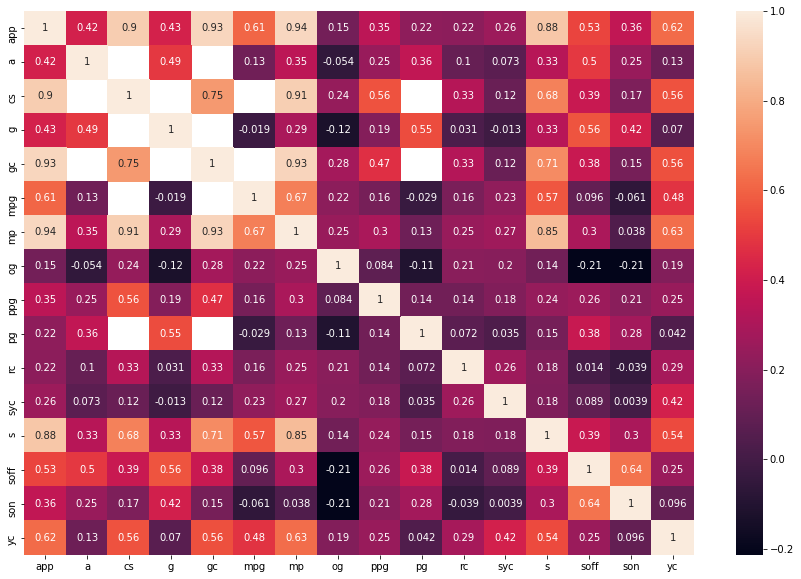

In [0]:
stats_df = pd.DataFrame(pl_stats_markval, columns = stats_cols)
corr = stats_df.corr()

plt.figure(figsize = (15, 10))
sns.heatmap(corr, annot = True)
plt.show()

From the heatmap we can see that there are several highly-correlated features. More specifically, appearance of football players is highly correlated with squad inclusion, number of minutes that player played, clean sheets and concended goals.

In [0]:
fig = px.histogram(pl_stats_markval,
                   x = 'mv',
                   labels = {"mv": "Mean-Summarized Market Values for All Seasons"}, 
                   title = "Mean-Summarized Market Values for All Seasons Histogram")
fig.show()

We can see that starting from approx. 7.5M the rest of the data can be filtered out as outliers.

In [0]:
pl_stats_markval.mv.loc[pl_stats_markval.mv > 7500000] = np.NaN

In [0]:
fig = px.histogram(pl_stats_markval,
                   x = 'mv',
                   labels = {"mv": "Mean-Summarized Market Values for All Seasons"}, 
                   title = "Mean-Summarized Market Values for All Seasons Histogram")
fig.show()

In [0]:
fig = px.histogram(pl_stats_markval,
                   x = 'app',
                   labels = {"app": "Appearances"}, 
                   title = "Number of Appearances")
fig.show()

As we can see appearances are normally distributed, but also contains some outliers. We can see in the plot that the number of appearances starting from 20 need to be filtered out due to its minimal count. Let us get rid of them and replace it with NaN.

In [0]:
pl_stats_markval.app.loc[pl_stats_markval.app > 20] = np.NaN

Lets plot the graph again to see the results.

In [0]:
fig = px.histogram(pl_stats_markval,
                   x = 'app',
                   labels = {"app": "Appearances"}, 
                   title = "Number of Appearances")
fig.show()

In [0]:
fig = px.scatter(pl_stats_markval, 
                 x = "app", 
                 color = 'main_field_position',
                 opacity = 0.7,
                 title = "MV vs Appearances",
                 labels = {"app": "Appearances", "mv": "Mean Market Value for All Seasons"},
                 y = "mv")
fig.show()

As we can notice from the above graph, the number of appearances between 5-15 indicate the higher market value. In other words, appearances below 5 and above 15 starts to affect the value of the player.

In [0]:
pl_stats_markval.main_field_position = pl_stats_markval.main_field_position.astype("object")

no_gk = pl_stats_markval.loc[pl_stats_markval.main_field_position != "goalkeepers"]
no_gk.main_field_position.value_counts()

defenders      4480
midfielders    4023
attackers      3711
Name: main_field_position, dtype: int64

In [0]:
fig = px.histogram(no_gk,
                   x = 'a',
                   labels = {"a": "Assists"}, 
                   title = "Number of Assists")
fig.show()

In [0]:
no_gk.a.loc[no_gk.a > 3] = np.NaN

fig = px.histogram(no_gk,
                   x = 'a',
                   labels = {"a": "Assists"}, 
                   title = "Number of Assists")
fig.show()

In [0]:
fig = px.box(no_gk, 
                 x = "a",
                 title = "MV vs Assists",
                 labels = {"a": "Assists", "mv": "Mean Market Value for All Seasons"},
                 hover_data = ["name"],
                 y = "mv")
fig.show()

From the figure we can conclude that the number of assists may highly impact the market value. From 1 to 2 theres a high difference between medians of boxplots and overall range of market values increases.

In [0]:
def pair_box(df, x_left_col, y_col, x_right_col, left_name, right_name, outlist = None, rm_outliers = False):
    
    if rm_outliers is True:
        df[x_left_col].loc[df[x_left_col] > outlist[0]] = np.NaN
        df[x_right_col].loc[df[x_right_col] > outlist[1]] = np.NaN

    fig = make_subplots(rows = 1, cols = 2, start_cell = "bottom-left")
    
    fig.add_trace(go.Box(x = df[x_left_col], y = df[y_col], name = left_name), row = 1, col = 1)
    fig.add_trace(go.Box(x = df[x_right_col], y = df[y_col], name = right_name), row = 1, col = 2)

    fig.show()

In [0]:
pair_box(pl_stats_markval, "yc",
         "mv", "syc",
         "Yellow Cards vs Market Value",
         "Second Yellow Cards vs Market Value",
         [6, 1],
         True)

In [0]:
pair_box(pl_stats_markval, "g",
         "mv", "og",
         "Goals vs Market Value",
         "Owngoals vs Market Value", rm_outliers = True, outlist = [10, 1])